In [ ]:
import os

fpath = os.getcwd()[:-12]+"\\Fixed_Length_GA"
print(fpath)
os.chdir(fpath)
os.getcwd()

with open("hyperparameters/seedfile.txt", "rb") as f:
        seed_value = int(f.read())

import numpy as np
np.random.seed(seed_value)

import shutil

from tqdm import tqdm

from scipy.linalg import expm, sqrtm, logm

import matplotlib.pyplot as plt
%matplotlib inline

import GA
import physics_functions
import physics_classes
import utils

In [2]:
N_levs = 20
Omega_S = 1.
beta = 5.
beta_range = 10.
npdtype ="complex128"
rho0_tuple = ("number", 0) 
model0 = physics_classes.model_thermalAncillas(rho0_tuple, N_levs, Omega_S, 1., 1., beta_range, npdtype)


betax = (beta + beta_range)/(2.*beta_range)
rho_beta = model0.get_rho(betax)

def evol_gdt(coh, g, dt, Nc):
    H_I = g*(np.kron(model0.a_dag, model0.sm) + np.kron(model0.a, model0.sp))
    U = expm(-1j*dt*H_I)
    rhoS_n = model0.rhoS_0
    for nc in range(Nc):
        rhoA = rho_beta + np.array([[0, 1j*coh],[-1j*coh, 0.]], dtype="complex128")
        rhoS_n = model0.collision(rhoS_n, rhoA, U)
    return rhoS_n

def trDalpha(rho, alpha):
    target = physics_functions.init_system_state(model0.H_sys, model0.a, model0.a_dag, ("thermal", beta), [("D", alpha)])
    return physics_functions.trace_distance(rho, target)


In [ ]:
coh_list = np.linspace(0., 0.1, 100)
Nc = 1000
alpha = 0.5
trDlist = []
for i in range(100):
    rho = evol_gdt(coh_list[i], 1., 0.01, Nc)
    if (np.linalg.eig(rho)[0].real).min()<-1e-6:
        print(coh_list[i])
        break

0.08282828282828283


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0')])

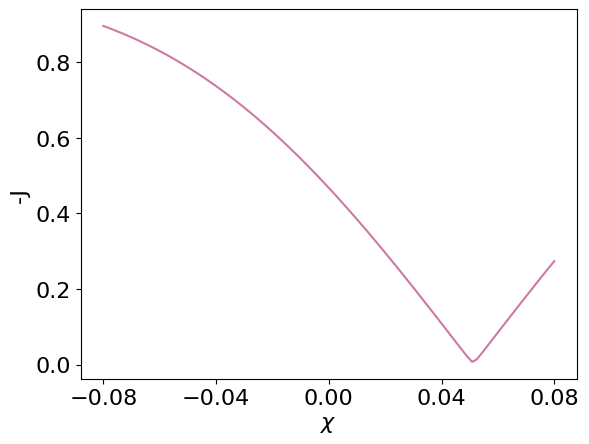

In [ ]:
coh_list = np.linspace(-0.08, 0.08, 100)
Nc = 1000
alpha = 0.5
trDlist = []
for i in range(100):
    rho = evol_gdt(coh_list[i], 1., 0.01, Nc)
    
    if (np.linalg.eig(rho)[0].real).min()<-1e-6:
        print("negative eigs: ", np.linalg.eig(rho)[0])
        break
    trDlist += [trDalpha(rho, alpha)]

plt.plot(coh_list, trDlist, color="#cc79a7")
plt.xlabel(r"$\chi$", fontsize = 16)
plt.ylabel("-J", fontsize = 16)

plt.xticks(np.arange(-0.08, 0.081, step=0.04), fontsize = 16)
plt.yticks(fontsize = 16)

#plt.savefig("figure_coherent1.pdf", bbox_inches="tight")

5.0
5.0


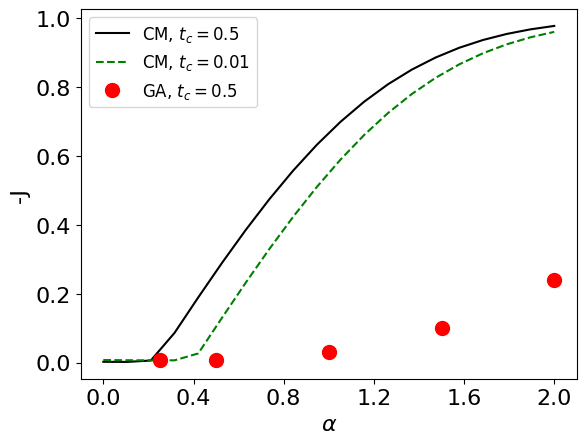

In [ ]:
sol_alpha = [0.25, 0.5, 1., 1.5, 2.] #dt=0.5, N=10
sol = [0.0079, 0.0063, 0.03 , 0.1, 0.24]

coh_list = np.linspace(-0.08, 0.08, 100)
alpha_list = np.linspace(0., 2., 20)
Nc = 500
print(0.01*Nc)
optima_ME = []
for k in range(20):
    trDlist = []
    for i in range(100):
        rho = evol_gdt(coh_list[i], 1., 0.01, Nc)
        if (np.linalg.eig(rho)[0].real).min()<-1e-6:
            print("negative eigs: ", np.linalg.eig(rho)[0])
            break
        trDlist += [trDalpha(rho, alpha_list[k])]
    optima_ME += [min(trDlist)]

Nc = 10
print(0.5*Nc)
optima_CM = []
for k in range(20):
    trDlist = []
    for i in range(100):
        rho = evol_gdt(coh_list[i], 1., 0.5, Nc)
        if (np.linalg.eig(rho)[0].real).min()<-1e-6:
            print("negative eigs: ", np.linalg.eig(rho)[0])
            break
        trDlist += [trDalpha(rho, alpha_list[k])]
    optima_CM += [min(trDlist)]

plt.xlabel(r"$\alpha$", fontsize = 16)
plt.ylabel("-J", fontsize = 16)

plt.plot(alpha_list, optima_CM, '-', label="CM, $t_c=0.5$", color="black")
plt.plot(alpha_list, optima_ME, '--', label="CM, $t_c=0.01$", color="green")
plt.plot(sol_alpha, sol, linestyle="", marker="o", markersize=10, label="GA, $t_c=0.5$", color="red")

plt.legend(fontsize=12)

plt.xticks(np.arange(0., 2.01, step=0.4),fontsize = 16)
plt.yticks(fontsize = 16)

#plt.savefig("figure_coherent2.pdf", bbox_inches="tight")

10.0
10.0


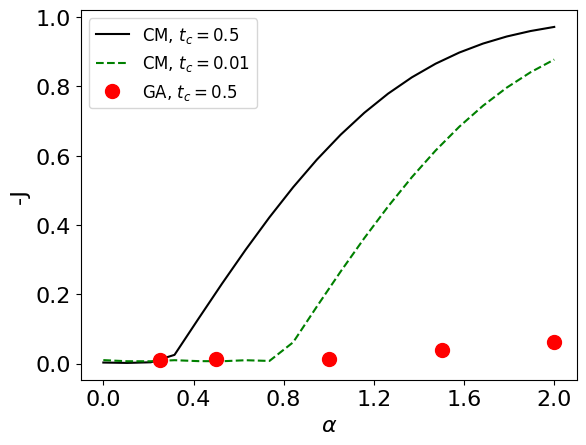

In [ ]:
sol_alpha = [0.25, 0.5, 1., 1.5, 2.]
sol = [0.011, 0.014, 0.014, 0.04, 0.063]

coh_list = np.linspace(-0.08, 0.08, 100)
alpha_list = np.linspace(0., 2., 20)
Nc = 1000
print(0.01*Nc)
optima_ME = []
for k in range(20):
    trDlist = []
    for i in range(100):
        rho = evol_gdt(coh_list[i], 1., 0.01, Nc)
        if (np.linalg.eig(rho)[0].real).min()<-1e-6:
            print("negative eigs: ", np.linalg.eig(rho)[0])
            break
        trDlist += [trDalpha(rho, alpha_list[k])]
    optima_ME += [min(trDlist)]

Nc = 20
print(0.5*Nc)
optima_CM = []
for k in range(20):
    trDlist = []
    for i in range(100):
        rho = evol_gdt(coh_list[i], 1., 0.5, Nc)
        if (np.linalg.eig(rho)[0].real).min()<-1e-6:
            print("negative eigs: ", np.linalg.eig(rho)[0])
            break
        trDlist += [trDalpha(rho, alpha_list[k])]
    optima_CM += [min(trDlist)]

plt.xlabel(r"$\alpha$", fontsize = 16)
plt.ylabel("-J", fontsize = 16)

plt.plot(alpha_list, optima_CM, '-', label="CM, $t_c=0.5$", color="black")
plt.plot(alpha_list, optima_ME, '--', label="CM, $t_c=0.01$", color="green")
plt.plot(sol_alpha, sol, linestyle="", marker="o", markersize=10, label="GA, $t_c=0.5$", color="red")

plt.legend(fontsize=12)

plt.xticks(np.arange(0., 2.01, step=0.4),fontsize = 16)
plt.yticks(fontsize = 16)


#plt.savefig("figure_coherent3.pdf", bbox_inches="tight")

30.0


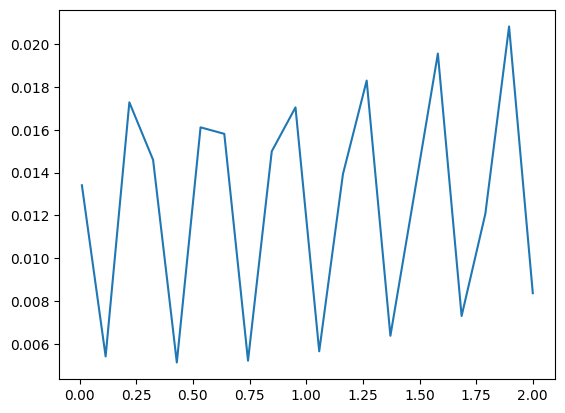

In [ ]:
coh_list = np.linspace(-0.08, 0.08, 100)
alpha_list = np.linspace(0., 2., 20)
Nc = 3000
print(0.01*Nc)
optima = []
for k in range(20):
    trDlist = []
    for i in range(100):
        rho = evol_gdt(coh_list[i], 1., 0.01, Nc)
        if (np.linalg.eig(rho)[0].real).min()<-1e-6:
            print("negative eigs: ", np.linalg.eig(rho)[0])
            break
        trDlist += [trDalpha(rho, alpha_list[k])]
    optima += [min(trDlist)]

plt.plot(alpha_list, optima)